## EastWestAirlines

## hierarchical_clustering

In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
df=pd.read_csv("D:\\assignment\\clustering\\EastWestAirlines1.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [110]:
#renaming 
df=df.rename(columns={'ID#': 'ID','Award?': 'Award'})
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [111]:
#dropping unnecessasry column
df1=df.drop(['ID','Award'],axis=1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [112]:
#standardization of numerical values
from sklearn.preprocessing import StandardScaler
df1_std=StandardScaler().fit_transform(df1)
print(df1_std)
df1_std.shape

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.39545434e+00]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.37995704e+00]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.41192021e+00]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31560393e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ...  2.85309024e-02
  -9.85033311e-02 -1.31608822e+00]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31754109e+00]]


(3999, 10)

In [113]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [114]:
df1_norm=norm_func(df.iloc[:,1:])

In [115]:
print(df1_norm)

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.

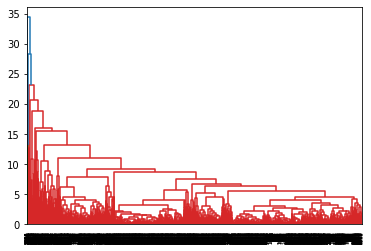

In [116]:
dendrogram = sch.dendrogram(sch.linkage(df1_std, method='complete'))

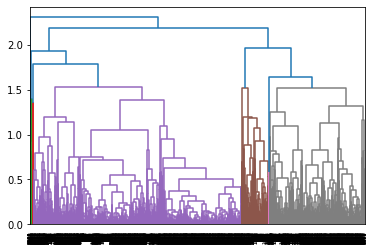

In [117]:
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='complete'))

In [118]:
hc1 = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')
hc1

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [119]:
hc1.fit(df1_std)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [120]:
y_hc1=hc1.fit_predict(df1_std)
y_hc1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
df1['h_clusterid1']=y_hc1
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid1
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [122]:
df1[df1['h_clusterid1']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid1
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [123]:
df1[df1['h_clusterid1']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid1
2015,53232,888,4,1,1,80696,65,22100,45,3831,1
3235,287033,0,1,1,1,26161,58,12873,53,2272,1
3583,160114,500,1,1,1,71954,86,30817,53,1373,1
3594,27619,0,4,1,1,83726,68,14050,46,1325,1


In [124]:
df1[df1['h_clusterid1']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid1
106,96627,1182,1,1,3,49059,26,2300,9,6738,2
384,28193,0,5,1,4,103456,32,0,0,6980,2
850,25629,0,4,1,5,107308,36,600,2,5966,2
904,15835,0,2,1,5,112171,16,0,0,5825,2
1036,154664,0,4,1,3,73881,33,0,0,5769,2
1244,166465,0,4,1,4,98717,30,0,0,5531,2
1300,737514,0,3,1,4,43993,40,2150,7,5030,2
1878,128302,0,5,1,4,132263,32,400,2,4103,2
1917,82981,0,5,1,3,105325,44,1000,2,3964,2
1946,126873,0,4,1,5,95598,32,500,1,3880,2


In [125]:
df1[df1['h_clusterid1']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid1
117,969559,0,1,1,1,2500,3,1000,2,7718,3
220,1302051,2706,5,1,1,90653,32,3050,7,7467,3
275,1704838,0,1,1,1,17108,32,4823,23,7283,3
318,766419,0,1,1,1,11398,3,398,1,7162,3
466,1113394,2015,5,1,1,60883,26,2600,9,8228,3
471,743745,2066,1,1,1,4100,20,2500,18,8228,3
481,1125076,0,3,1,1,23046,14,0,0,8107,3
488,1199220,2919,1,1,1,3800,19,3300,18,8023,3
629,747983,0,4,1,1,26117,15,50,1,6427,3
823,765738,0,5,1,1,62133,14,0,0,6112,3


In [126]:
df1[df1['h_clusterid1']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid1
335,278457,6727,4,1,1,57313,27,1000,2,7101,4
589,133445,8264,1,1,1,3375,13,0,0,6492,4
800,74924,6286,4,1,1,59650,13,0,0,6141,4
833,114932,8559,1,1,1,3150,13,1650,12,6092,4
896,218763,8753,1,1,1,11650,6,1150,3,5975,4
901,172110,9325,5,1,1,21382,23,950,3,5944,4
1177,32214,11148,3,1,1,12717,10,0,0,5576,4
1220,40965,10098,1,1,1,9850,11,1850,6,5429,4
1337,128664,8019,4,1,1,44298,16,50,1,5155,4
1545,132132,6920,3,1,1,20443,18,1310,4,3916,4


In [127]:
df1[df1['h_clusterid1']==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid1
8,443003,0,3,2,1,1753,43,3850,12,6948,5
198,8669,0,1,3,1,11397,16,0,0,7486,5
226,117329,0,1,2,1,6448,11,0,0,7416,5
381,167670,0,1,3,1,15907,13,0,0,6994,5
392,11189,0,1,2,1,9044,20,0,0,8296,5
561,380930,0,2,2,1,22485,25,213,1,6539,5
794,55610,0,1,2,1,5095,13,0,0,6151,5
940,44824,0,1,3,1,21107,19,2000,4,5916,5
1149,84856,0,1,2,1,6894,13,0,0,5547,5
1270,16103,0,1,3,1,10819,13,0,0,5427,5


## K-MEANS Clustering

In [128]:
#importing K-MEANS
from sklearn.cluster import KMeans

In [129]:
df_k=pd.read_csv("D:\\assignment\\clustering\\EastWestAirlines1.csv")
df_k

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [130]:
df_k1=df_k.rename({'ID#':'ID','Award?':'Award'},axis=1)
df_k1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [131]:
df_k2=df_k1.drop(['ID','Award'],axis=1)
df_k2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [132]:
 #Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [133]:
df_norm1=norm_func(df_k2.iloc[:,1:])
df_norm1

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


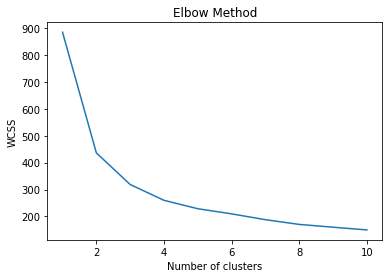

In [134]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_norm1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
wcss

[884.3008557926594,
 436.1896666597255,
 318.78512404181834,
 260.05167762001474,
 228.83474994662177,
 209.7463465092756,
 188.08196098338217,
 170.5270536533863,
 160.18197763906383,
 150.13671087346708]

In [136]:
cluster_new=KMeans(10,random_state=42)
cluster_new.fit(df_norm1)

KMeans(n_clusters=10, random_state=42)

In [137]:
cluster_new

KMeans(n_clusters=10, random_state=42)

In [138]:
df_norm1

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [139]:
### another method of scaling

#standarlization of the numerical values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_k2 = scaler.fit_transform(df_k2.iloc[:,0:])
print(scaled_df_k2)
scaled_df_k2.shape

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.39545434e+00]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.37995704e+00]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.41192021e+00]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31560393e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ...  2.85309024e-02
  -9.85033311e-02 -1.31608822e+00]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31754109e+00]]


(3999, 10)

<AxesSubplot:>

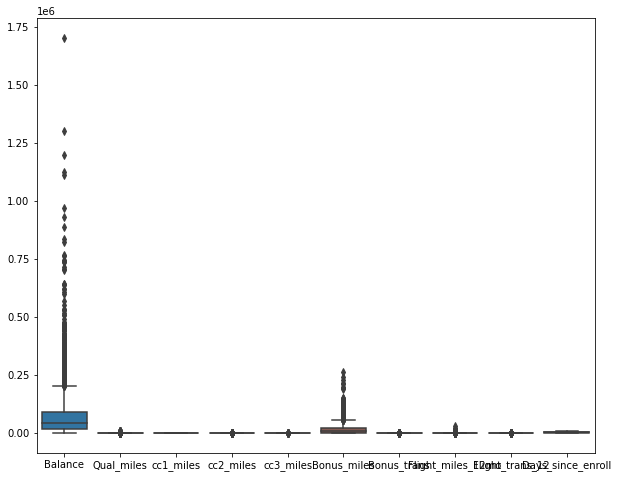

In [140]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_k2)

In [141]:
kmeans = KMeans(n_clusters=10,random_state=42)
cluster_new=kmeans.fit_predict(scaled_df_k2)

In [142]:
cluster_new

array([1, 1, 1, ..., 5, 8, 8])

In [143]:
df_k2["cluster"]=cluster_new

In [144]:
df_k2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,8
3995,64385,0,1,1,1,981,5,0,0,1395,8
3996,73597,0,3,1,1,25447,8,0,0,1402,5
3997,54899,0,1,1,1,500,1,500,1,1401,8


In [145]:
kmeans.cluster_centers_

array([[ 5.79331285e-01, -8.10238771e-02,  1.73277635e+00,
        -9.82418871e-02, -5.25419861e-02,  1.66936035e+00,
         9.31933944e-01, -5.81293769e-02, -5.11384439e-02,
         6.25336730e-01],
       [-2.05587151e-01, -1.08115682e-01, -6.89606560e-01,
        -9.82418871e-02, -5.75923157e-02, -5.49916050e-01,
        -5.91893138e-01, -1.90946437e-01, -2.00506885e-01,
         8.18190813e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02],
       [ 9.04425647e-01,  6.89601538e-01,  2.90499661e-01,
        -9.82418871e-02, -6.27665798e-02,  1.07398045e+00,
         2.79127304e+00,  6.87710931e+00,  6.58574903e+00,
         3.52262781e-02],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.

In [146]:
df_k2[df_k2.cluster==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
5,16420,0,1,1,1,0,0,0,0,6942,1
...,...,...,...,...,...,...,...,...,...,...,...
2202,35445,0,1,1,1,3379,9,0,0,4198,1
2208,65519,0,1,1,1,0,0,0,0,4150,1
2277,119340,1000,1,1,1,400,5,400,5,3855,1
2279,105957,0,1,1,1,4881,12,0,0,3859,1


In [147]:
#consider k=10

#Building Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(10, random_state=42)
clusters_new=clusters_new.fit_predict(df_k2)

In [148]:
df_k2.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,131976.522954,81.437126,4.445110,1.000000,1.001996,57456.473054,20.550898,378.672655,1.179641,5409.802395
1,1,52849.195542,60.663627,1.110436,1.000000,1.001013,3862.702128,5.915907,190.574468,0.608916,5813.944276
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233
3,3,164734.027027,677.567568,2.459459,1.000000,1.000000,43079.270270,38.405405,10088.243243,26.351351,4191.297297
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
5,5,70875.998929,36.821199,3.018201,1.000000,1.001071,21550.626338,17.057816,155.095289,0.444325,4012.014989
6,6,106190.840000,226.405714,1.737143,1.000000,1.000000,18613.645714,19.931429,3527.857143,10.297143,4200.331429
7,7,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364
8,8,32519.086192,42.766527,1.054393,1.000000,1.000000,3012.484519,5.239331,130.840167,0.451883,2138.500418


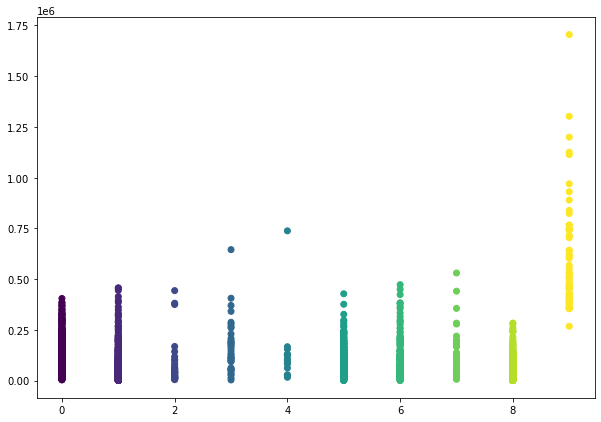

In [149]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df_k2['cluster'],df_k2['Balance'],c=cluster_new) 

In [150]:
df_k2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,8
3995,64385,0,1,1,1,981,5,0,0,1395,8
3996,73597,0,3,1,1,25447,8,0,0,1402,5
3997,54899,0,1,1,1,500,1,500,1,1401,8


In [151]:
df_k2[df_k2['cluster']==0]
df_k2_0=df_k2[df_k2['cluster']==0]
df_k2_0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,0
9,104860,0,3,1,1,28426,28,1150,3,6931,0
11,96522,0,5,1,1,61105,19,0,0,6924,0
15,28495,0,4,1,1,49442,15,0,0,6912,0
16,51890,0,4,1,1,48963,16,0,0,6910,0
...,...,...,...,...,...,...,...,...,...,...,...
3753,70178,0,5,1,1,61530,12,1300,6,3306,0
3769,35766,0,4,1,1,49702,20,784,1,3503,0
3822,166638,0,5,1,1,64572,22,0,0,1697,0
3855,190730,0,5,1,1,78916,28,2450,9,1648,0


In [152]:
df_k2[df_k2['cluster']==1]
df_k2_1=df_k2[df_k2['cluster']==1]
df_k2_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
5,16420,0,1,1,1,0,0,0,0,6942,1
...,...,...,...,...,...,...,...,...,...,...,...
2202,35445,0,1,1,1,3379,9,0,0,4198,1
2208,65519,0,1,1,1,0,0,0,0,4150,1
2277,119340,1000,1,1,1,400,5,400,5,3855,1
2279,105957,0,1,1,1,4881,12,0,0,3859,1


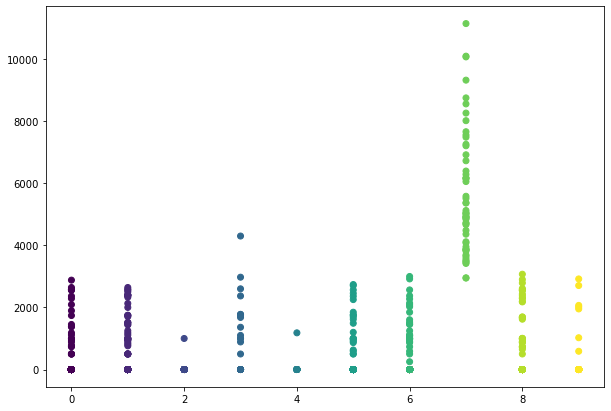

In [153]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_k2['cluster'],df_k2['Qual_miles'],c=cluster_new) 

<AxesSubplot:ylabel='Frequency'>

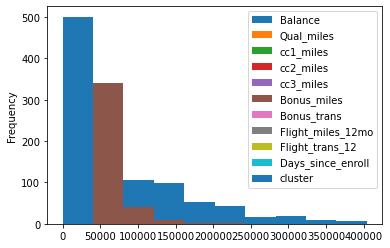

In [154]:
df_k2_0.plot.hist()

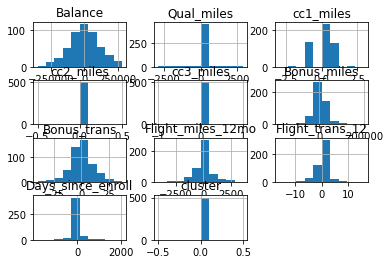

In [155]:
df_k2_0.diff().hist();

<AxesSubplot:>

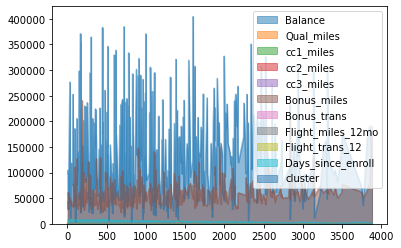

In [156]:
df_k2_0.plot.area(stacked=False)

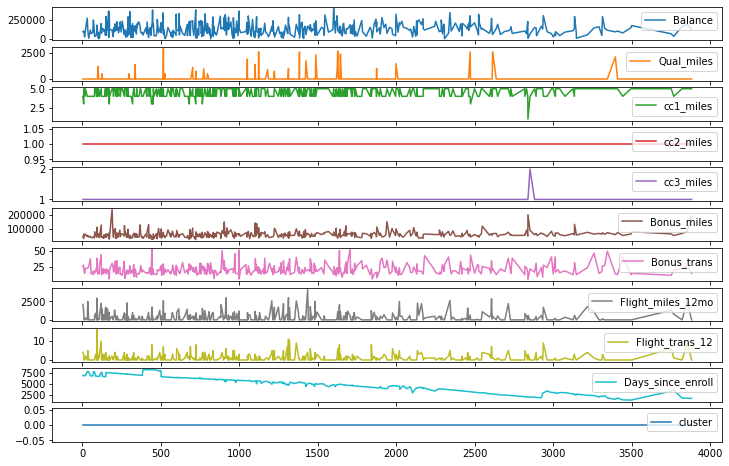

In [157]:
df_k2_0.plot(subplots=True, figsize=(12, 8));

<AxesSubplot:ylabel='Frequency'>

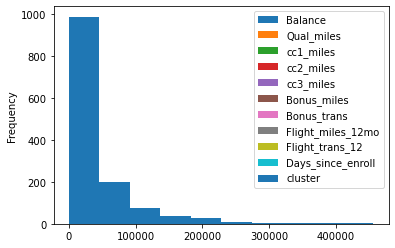

In [158]:
df_k2_1.plot.hist()

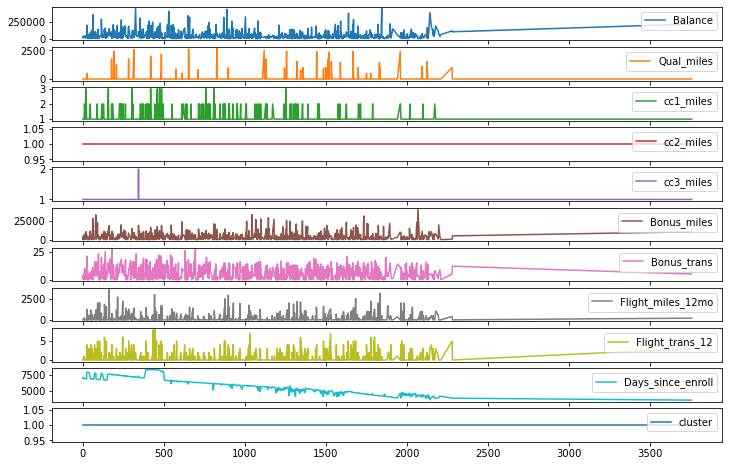

In [159]:
df_k2_1.plot(subplots=True, figsize=(12, 8));

## DBSCAN Clustering

In [160]:
from sklearn.cluster import DBSCAN

In [161]:
df_d=pd.read_csv("D:\\assignment\\clustering\\EastWestAirlines1.csv")
df_d.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [162]:
df_d1=df_d.rename({'ID#':'ID','Award?':'Award'},axis=1)
df_d1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [163]:
df_d2=df_d1.drop(['ID','Award'],axis=1)
df_d2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [164]:
array0=df_d2.values

In [165]:
array0

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [166]:
##Standard scaling
stscaler=StandardScaler()
x=stscaler.fit_transform(array0)

In [167]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [168]:
dbscan=DBSCAN(eps=2,min_samples=3)
dbscan.fit_predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
cluster_d=pd.DataFrame(dbscan.labels_,columns=['cluster_dbscan'])
cluster_d

,cluster_dbscan
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [171]:
 #Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [172]:
df_d_norm1=norm_func(df_d2.iloc[:,0:])
df_d_norm1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [173]:
array1=df_d_norm1

In [174]:
array1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [175]:
dbscan=DBSCAN(eps=4,min_samples=4)
dbscan.fit_predict(df_d_norm1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [177]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler() # creating an instance of the class object
df_d_norm2 = pd.DataFrame(rs.fit_transform(df_d_norm1), columns=df_d_norm1.columns)

In [178]:
df_d_norm2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.202419,0.0,0.0,0.0,0.0,-0.310281,-0.785714,0.000000,0.0,0.839185
1,-0.322877,0.0,0.0,0.0,0.0,-0.308463,-0.714286,0.000000,0.0,0.829938
2,-0.023593,0.0,0.0,0.0,0.0,-0.135163,-0.571429,0.000000,0.0,0.849010
3,-0.383356,0.0,0.0,0.0,0.0,-0.295825,-0.785714,0.000000,0.0,0.825314
4,0.739816,0.0,1.5,0.0,0.0,1.602137,1.000000,6.678457,4.0,0.820402
...,...,...,...,...,...,...,...,...,...,...
3994,-0.333272,0.0,0.0,0.0,0.0,0.060043,-0.571429,0.643087,1.0,-0.778211
3995,0.288157,0.0,0.0,0.0,0.0,-0.274495,-0.500000,0.000000,0.0,-0.780523
3996,0.412851,0.0,1.0,0.0,0.0,0.810448,-0.285714,0.000000,0.0,-0.778500
3997,0.159753,0.0,0.0,0.0,0.0,-0.295825,-0.785714,1.607717,1.0,-0.778789


In [179]:
array2=df_d_norm2

In [180]:
array2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.202419,0.0,0.0,0.0,0.0,-0.310281,-0.785714,0.000000,0.0,0.839185
1,-0.322877,0.0,0.0,0.0,0.0,-0.308463,-0.714286,0.000000,0.0,0.829938
2,-0.023593,0.0,0.0,0.0,0.0,-0.135163,-0.571429,0.000000,0.0,0.849010
3,-0.383356,0.0,0.0,0.0,0.0,-0.295825,-0.785714,0.000000,0.0,0.825314
4,0.739816,0.0,1.5,0.0,0.0,1.602137,1.000000,6.678457,4.0,0.820402
...,...,...,...,...,...,...,...,...,...,...
3994,-0.333272,0.0,0.0,0.0,0.0,0.060043,-0.571429,0.643087,1.0,-0.778211
3995,0.288157,0.0,0.0,0.0,0.0,-0.274495,-0.500000,0.000000,0.0,-0.780523
3996,0.412851,0.0,1.0,0.0,0.0,0.810448,-0.285714,0.000000,0.0,-0.778500
3997,0.159753,0.0,0.0,0.0,0.0,-0.295825,-0.785714,1.607717,1.0,-0.778789


In [181]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
cluster_d=pd.DataFrame(dbscan.labels_,columns=['cluster_dbscan'])
cluster_d

,cluster_dbscan
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [183]:
## Adding cluster values with data set
clustered_d= pd.concat([df_d2,cluster_d],axis=1)

In [184]:
clustered_d[clustered_d['cluster_dbscan']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


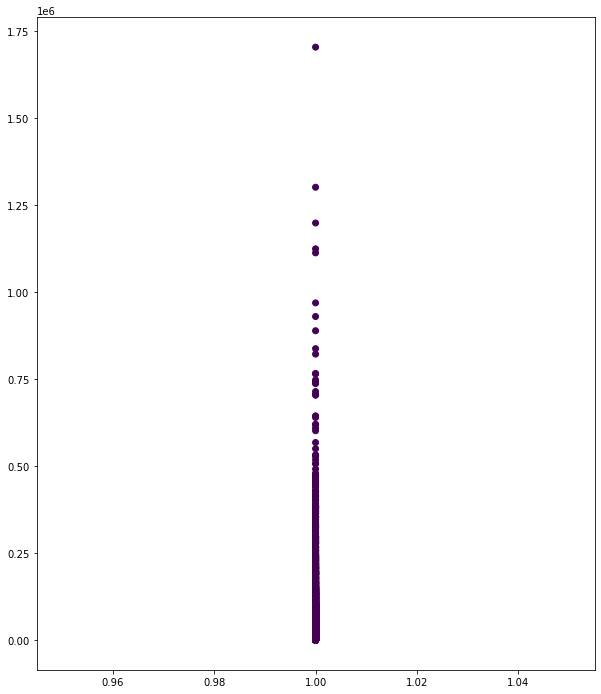

In [185]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered_d['cluster_dbscan']==0,df_d['Balance'], c=dbscan.labels_)

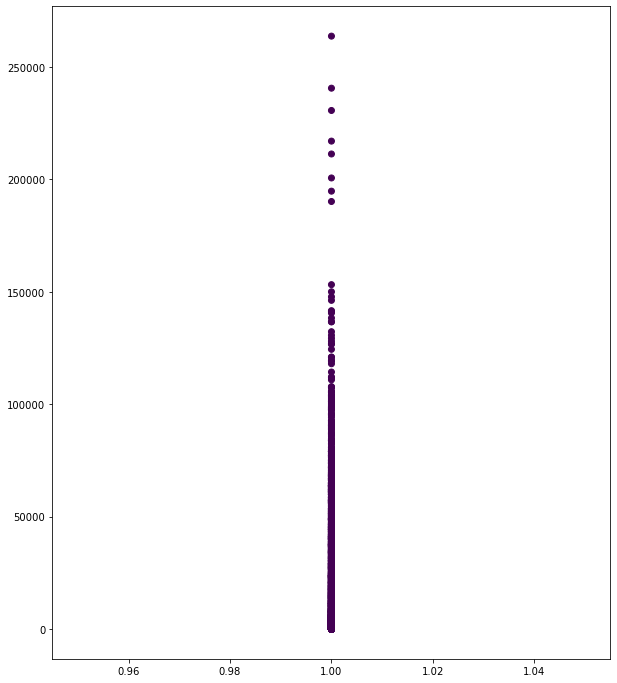

In [186]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered_d['cluster_dbscan']==0,df_d['Bonus_miles'], c=dbscan.labels_)

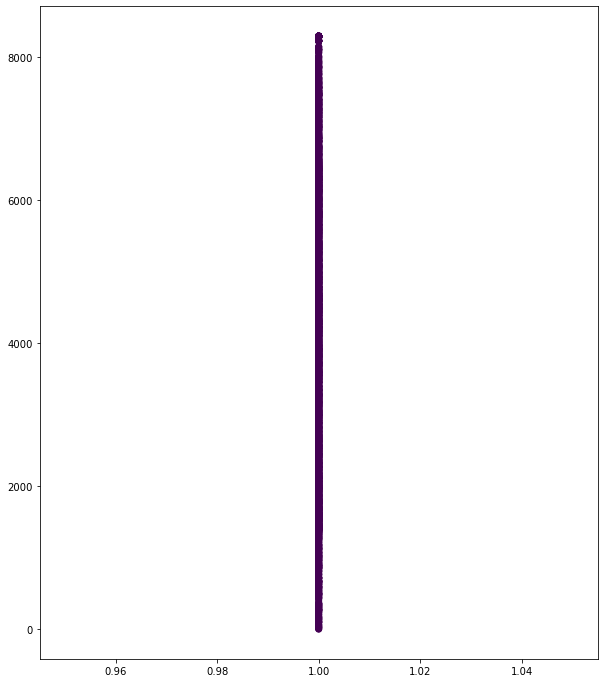

In [187]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered_d['cluster_dbscan']==0,df_d['Days_since_enroll'], c=dbscan.labels_)

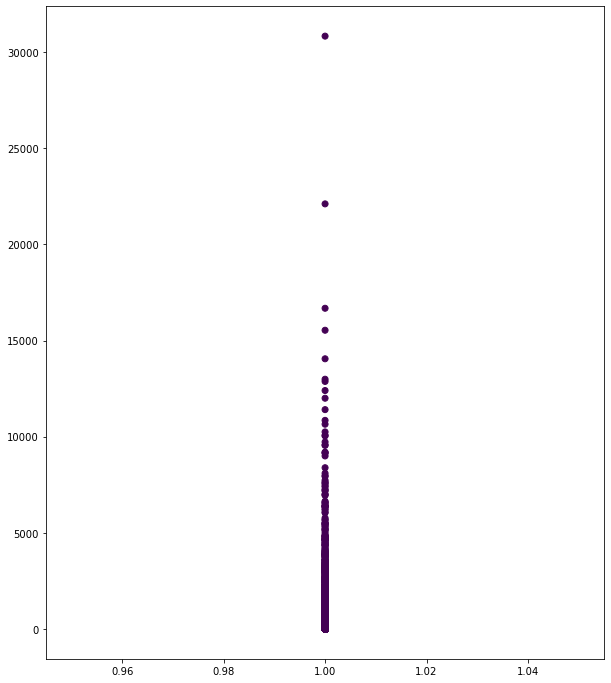

In [188]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered_d['cluster_dbscan']==0,df_d['Flight_miles_12mo'], c=dbscan.labels_)

<AxesSubplot:>

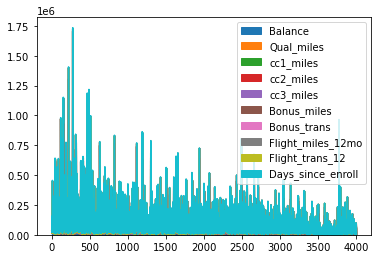

In [189]:
df_d2.plot.area()

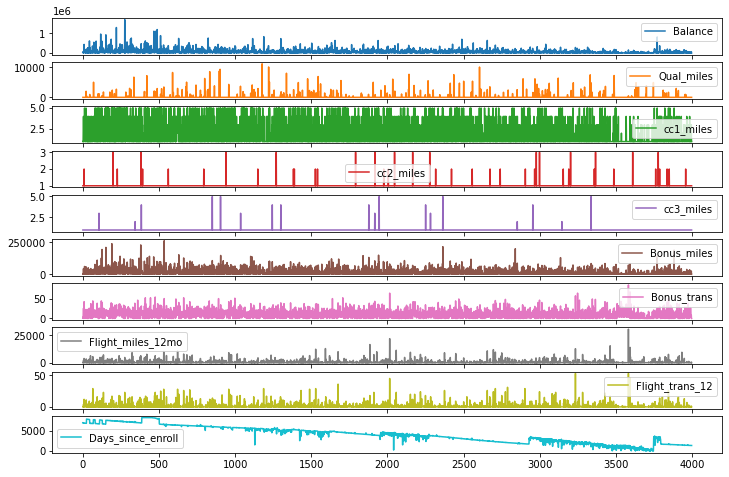

In [190]:
df_d2.plot(subplots=True, figsize=(12, 8));

In [191]:
cluster_0=clustered_d[clustered_d['cluster_dbscan']==0]
cluster_0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

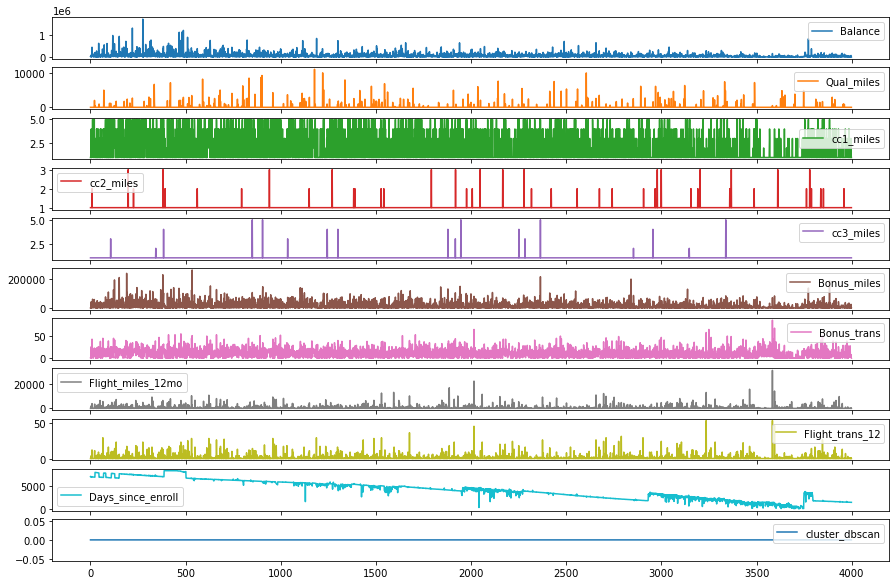

In [192]:
cluster_0.plot(subplots=True,figsize=(15,10))